In [132]:
import numpy as np
import pandas as pd
import scipy

from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [133]:
btc5min_data = pd.read_csv('BINANCE_BTCUSDT, 5.csv')
btc5min_data['price'] = pd.to_numeric(sp_data.open, errors='coerce')
btc5min_data.dropna(inplace=True)

In [134]:
btc5min_data.head(3)

,time,open,high,low,close,Volume,Volume MA,price
0,1617109200,59112.81,59265.18,59109.16,59141.89,263.902903,234.711945,59112.81
1,1617109500,59141.90,59142.05,58937.84,58955.53,352.315466,245.689359,59141.90
2,1617109800,58955.53,59058.98,58900.00,58902.11,319.323272,253.464058,58955.53


# Convert the timestamps

In [135]:
btc5min_data['time'] = pd.to_datetime(sp_data['time'],unit='s')

In [101]:
btc5min_data.tail(3)

,time,open,high,low,close,Volume,Volume MA,price
3879,2021-04-13 00:20:00,60221.44,60279.95,60200.00,60208.98,207.170942,165.507511,60221.44
3880,2021-04-13 00:25:00,60208.99,60363.03,60200.02,60315.36,305.219338,174.437759,60208.99
3881,2021-04-13 00:30:00,60315.36,60333.02,60227.40,60234.20,149.524449,175.921037,60315.36


# Visualization Functions

In [123]:
def ilinechart(df, x, y, groups=None, title=""):
    fig = px.line(df, x=x, y=y, color=groups, title=title, template="none")
    #if groups != None:
    #    for item in range(len(fig.data)-1):
    #        fig.data[item].update(name=fig.data[item]['name'].split('=')[1])
    fig.show()

def iscatter(df, x, y, color=None, size=None, title=""):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, title=title, template='none')
    fig.update_traces(marker_line_color='black', marker_line_width=1)
    fig.show()

def results(y_train, y_test, y_train_pred, y_test_pred, title="", scores=True, scatter=True, line=False):
    if scores==True:
        print('Train')
        print(f'R-squared: {r2_score(y_train, y_train_pred):.4f}')
        print(f'MAE: {mean_absolute_error(y_train, y_train_pred):.2f}')
        print(f'RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.2f}')
        print('\nTest')
        print(f'R-squared: {r2_score(y_test, y_test_pred):.4f}')
        print(f'MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
        print(f'RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}')
    train_results = pd.DataFrame({'price': y_train, 'Predicted': y_train_pred})
    train_results['Set'] = 'Train'
    test_results = pd.DataFrame({'price': y_test, 'Predicted': y_test_pred})
    test_results['Set'] = 'Test'
    results = pd.concat([train_results, test_results])
    if scatter==True:
        iscatter(results, x='price', y='Predicted', color='Set', title=title)
    if line==True:
        melted = results.reset_index().melt(id_vars=['time', 'Set'], value_vars=['price', 'Predicted'])
        melted['variable'] = melted['Set'] + ' ' + melted['variable']
        ilinechart(melted, x='time', y='value', groups='variable', title=title)

In [122]:
btc5min_data.head(1)

,open,high,low,close,Volume,Volume MA,price,t-6,t-7,t-8,t-9,t-10
time,,,,,,,,,,,,
2021-03-30 13:50:00,58899.99,58983.54,58822.02,58860.01,299.810111,237.149405,58899.99,59010.36,58902.1,58955.53,59141.9,59112.81


# Visualization

In [116]:
ilinechart(btc5min_data, x='time', y='price',title='BTC/USDT 5 Minute')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['open', 'high', 'low', 'close', 'Volume', 'Volume MA', 'price', 't-6', 't-7', 't-8', 't-9', 't-10'] but received: time

In [104]:
# Using prior week of closing prices to predict the next week
history = 5
future = 5

shifts = [x + future for x in list(range(1, history + 1))]
print(shifts)

[6, 7, 8, 9, 10]


In [105]:
for shift in shifts:
    btc5min_data['t-' + str(shift)] = btc5min_data['price'].shift(shift)

btc5min_data.head(15)

,time,open,high,low,close,Volume,Volume MA,price,t-6,t-7,t-8,t-9,t-10
0,2021-03-30 13:00:00,59112.81,59265.18,59109.16,59141.89,263.902903,234.711945,59112.81,NaN,NaN,NaN,NaN,NaN
1,2021-03-30 13:05:00,59141.90,59142.05,58937.84,58955.53,352.315466,245.689359,59141.90,NaN,NaN,NaN,NaN,NaN
2,2021-03-30 13:10:00,58955.53,59058.98,58900.00,58902.11,319.323272,253.464058,58955.53,NaN,NaN,NaN,NaN,NaN
3,2021-03-30 13:15:00,58902.10,59050.00,58835.00,59010.35,497.029922,269.434170,58902.10,NaN,NaN,NaN,NaN,NaN
4,2021-03-30 13:20:00,59010.36,59152.10,59001.00,59081.89,305.367655,277.426870,59010.36,NaN,NaN,NaN,NaN,NaN
5,2021-03-30 13:25:00,59089.51,59133.41,59060.19,59095.74,190.019904,276.901586,59089.51,NaN,NaN,NaN,NaN,NaN
6,2021-03-30 13:30:00,59095.74,59111.33,58920.22,58939.98,202.669877,263.434360,59095.74,59112.81,NaN,NaN,NaN,NaN
7,2021-03-30 13:35:00,58939.97,59079.00,58933.05,59010.14,249.361144,259.866844,58939.97,59141.90,59112.81,NaN,NaN,NaN
8,2021-03-30 13:40:00,59010.14,59072.35,58930.87,58981.85,192.179404,250.427963,59010.14,58955.53,59141.90,59112.81,NaN,NaN
9,2021-03-30 13:45:00,58980.16,58980.17,58883.22,58897.99,183.967101,240.083897,58980.16,58902.10,58955.53,59141.90,59112.81,NaN


In [106]:
btc5min_data.dropna(inplace=True)
btc5min_data = btc5min_data.set_index('time')
btc5min_data.head()

,open,high,low,close,Volume,Volume MA,price,t-6,t-7,t-8,t-9,t-10
time,,,,,,,,,,,,
2021-03-30 13:50:00,58899.99,58983.54,58822.02,58860.01,299.810111,237.149405,58899.99,59010.36,58902.10,58955.53,59141.90,59112.81
2021-03-30 13:55:00,58860.01,58930.08,58819.19,58890.01,347.944285,246.090726,58860.01,59089.51,59010.36,58902.10,58955.53,59141.90
2021-03-30 14:00:00,58890.01,58934.39,58751.00,58794.65,286.509064,251.588955,58890.01,59095.74,59089.51,59010.36,58902.10,58955.53
2021-03-30 14:05:00,58793.65,58796.97,58665.24,58679.71,284.102467,254.913502,58793.65,58939.97,59095.74,59089.51,59010.36,58902.10
2021-03-30 14:10:00,58679.70,58804.93,58626.92,58796.30,256.011551,259.320929,58679.70,59010.14,58939.97,59095.74,59089.51,59010.36


In [107]:
x = btc5min_data.drop(columns='price')
y = btc5min_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) 

In [108]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=5)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [127]:
results(y_train, y_test, y_train_pred, y_test_pred, title='Random Forest Regression', line=True)

Train
R-squared: 0.9993
MAE: 18.29
RMSE: 24.62

Test
R-squared: 0.9060
MAE: 95.39
RMSE: 120.68


In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

results(y_train, y_test, y_train_pred, y_test_pred, title='Linear Regression Not Shuffled', line=True)

Train
R-squared: 1.0000
MAE: 0.00
RMSE: 0.00

Test
R-squared: 1.0000
MAE: 0.00
RMSE: 0.00


In [129]:
history = 10
future = 5

past_shifts = [x for x in list(range(1, history + 1))]
future_shifts = [x for x in list(range(1, future))]
past_shifts, future_shifts

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4])

In [140]:
shifted = btc5min_data.copy()[['time', 'close']]
shifted.columns = ['time', 't+0']

In [141]:
for shift in future_shifts:
    shifted['t+' + str(shift)] = shifted['t+0'].shift(-shift)
for shift in past_shifts:
    shifted['t-' + str(shift)] = shifted['t+0'].shift(shift)
shifted.dropna().head()

,time,t+0,t+1,t+2,t+3,t+4,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10
10,2021-03-30 13:50:00,58860.01,58890.01,58794.65,58679.71,58796.30,58897.99,58981.85,59010.14,58939.98,59095.74,59081.89,59010.35,58902.11,58955.53,59141.89
11,2021-03-30 13:55:00,58890.01,58794.65,58679.71,58796.30,58789.00,58860.01,58897.99,58981.85,59010.14,58939.98,59095.74,59081.89,59010.35,58902.11,58955.53
12,2021-03-30 14:00:00,58794.65,58679.71,58796.30,58789.00,58784.27,58890.01,58860.01,58897.99,58981.85,59010.14,58939.98,59095.74,59081.89,59010.35,58902.11
13,2021-03-30 14:05:00,58679.71,58796.30,58789.00,58784.27,58894.14,58794.65,58890.01,58860.01,58897.99,58981.85,59010.14,58939.98,59095.74,59081.89,59010.35
14,2021-03-30 14:10:00,58796.30,58789.00,58784.27,58894.14,58878.46,58679.71,58794.65,58890.01,58860.01,58897.99,58981.85,59010.14,58939.98,59095.74,59081.89


In [143]:
shifted = shifted.dropna()
shifted = shifted.set_index('time')

In [148]:
import pickle
import os
cwd = os.getcwd()

x = shifted[['t-' + str(shift) for shift in past_shifts]]

future_shifts = [x for x in list(range(1, future))]
future_shifts = [0] + future_shifts

models = []

for future_shift in future_shifts:
    y = shifted['t+' + str(future_shift)]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print(
        'MAE for t+{}: Train {:.2f} Test {:.2f}'.format(
            future_shift, 
            mean_absolute_error(y_train, y_train_pred), 
            mean_absolute_error(y_test, y_test_pred)
        )
    )
    models.append(model)

with open(f'{cwd}/ts_shift_models.pkl', 'wb') as f:
    pickle.dump(models, file=f)

MAE for t+0: Train 68.31 Test 72.31
MAE for t+1: Train 92.52 Test 97.43
MAE for t+2: Train 110.32 Test 113.07
MAE for t+3: Train 124.90 Test 128.17
MAE for t+4: Train 137.45 Test 140.30


In [150]:
with open(f'{cwd}/ts_shift_models.pkl', 'rb') as f:
    loaded_models = pickle.load(file=f)

In [151]:
param_df = pd.DataFrame(columns=x.columns)
for i, model in enumerate(loaded_models):
    param_df.loc[f't+{i} model'] = model.coef_

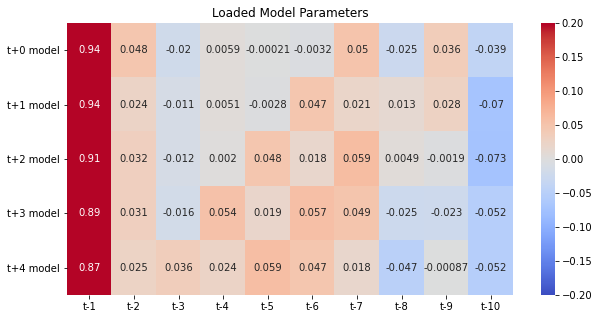

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(param_df, annot=True, center=0, vmin=-0.2, vmax=0.2, cmap='coolwarm')
plt.yticks(rotation=0)
plt.title('Loaded Model Parameters')
plt.show()

In [153]:
print("Today's price:")
print(f'${x.iat[-1,0]:.2f}')

Today's price:
$60084.90


In [154]:
print('\nToday\'s prediction and future forecast:')
for model in loaded_models:
    print(f'${model.predict(x.iloc[-1:])[0]:.2f}')


Today's prediction and future forecast:
$60068.71
$60058.47
$60048.61
$60035.93
$60025.48
